Github: 

# Homework 1
EE399

Ichiro Nakata

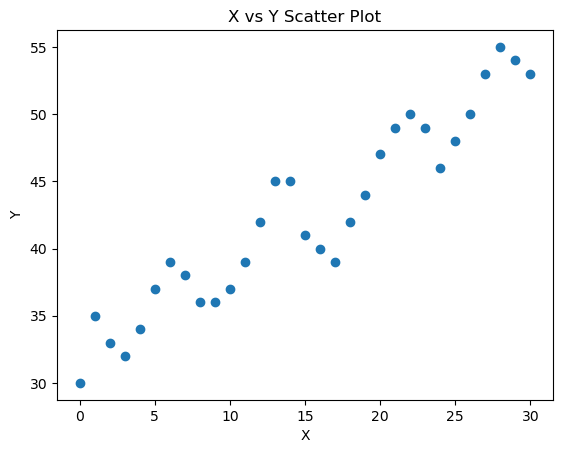

In [62]:
#Import Block
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

#Start Data
X=np.arange(0,31)
Y=np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41,
40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

plt.scatter(X,Y)
plt.title('X vs Y Scatter Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Part [i]

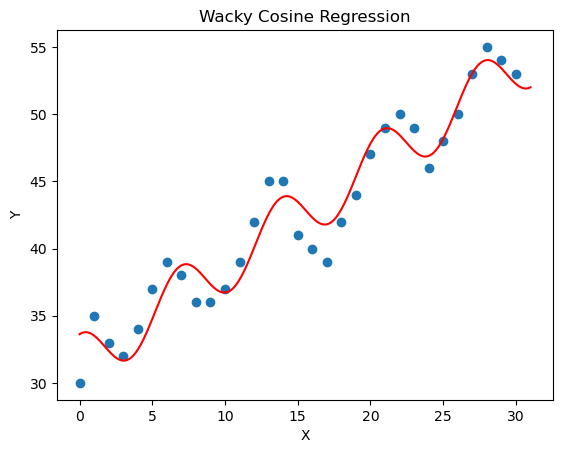

In [63]:
# [i] Write code to find the minimum error and determine the parameters A, B, C, D
iP = np.array([3.5, 1*np.pi/4, 2/3, 32])
  
#Find error
def err(c, x, y):
    return np.sqrt(np.sum((c[0]*np.cos(c[1]*x)+c[2]*x+c[3]-y)**2))
    
fit = opt.minimize(err, iP, args=(X, Y), method='Nelder-Mead')
c = fit.x

#Equation
xSmo = np.arange(0, 31.1, 0.1)
yfit = (c[0]*np.cos(c[1]*xSmo)+c[2]*xSmo+c[3])
    

#Plot
plt.scatter(X, Y)
plt.plot(xSmo, yfit, 'r-')
plt.title('Wacky Cosine Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Part [ii]

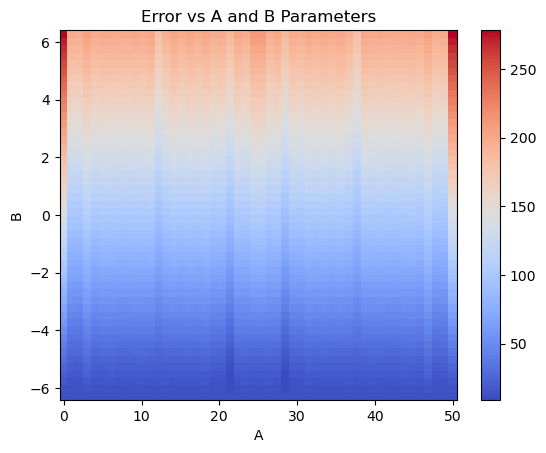

In [43]:
# [ii] From previous, fix two parameters and sweep through values of the other two parameters. Use something like 'pcolor' to visualize
#How many minima can you find?
#A: In the graph there appears to be 6 distinct minima

#Vary A and B
aVar = np.linspace(0, 50, 50)
bVar = np.linspace(-2*np.pi, 2*np.pi, 50)
A, B = np.meshgrid(aVar, bVar)


#compute error for each combo of A and B variations
errorGrid = np.zeros((len(aVar), len(bVar)))
for i, a in enumerate(aVar):
    for j, b in enumerate(bVar):
        yPred = a*np.cos(b*X)+c[2]*X+c[3]
        error = yPred - Y
        errorGrid[i, j] = np.sqrt(np.sum(error**2))


plt.pcolor(A, B, errorGrid, cmap='coolwarm')
plt.colorbar()
plt.title('Error vs A and B Parameters')
plt.xlabel('A')
plt.ylabel('B')
plt.show()

# Part [iii]

In [68]:
# [iii and iv] Using the first 20 data points as training data, fit a line, parabola, and 19th degree polynomial to data.
#Compute the least-square error for each of there over the training points
#Then compute the least square error of these models on the test data which are the remaining 10 points
#[iv] Do part [iii] again but use the first 10 as training and the last 10 as test

train_X = X[:20]
train2_X = X[:10]
train_Y = Y[:20]
train2_Y = Y[:10]

test_X = X[20:]
test_Y = X[20:]

Error: 74.8181887622387


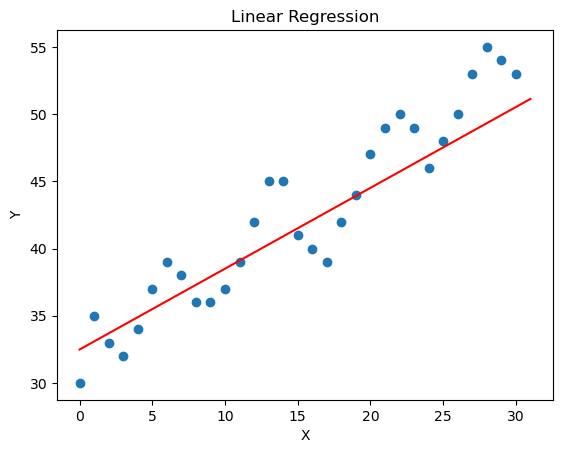

In [57]:
#Line fit
def linErr(c1, x, y):
    return np.sqrt(np.sum((c1[0]*x + c1[1] -y)**2))
    
ic1 = [1,1] #initial parameters

linFit = opt.minimize(linErr, ic1, args=(train_X, train_Y))
fc1 = linFit.x

#Get and print error
tLinErr = linErr(fc1, test_X, test_Y)
print('Error: ' + str(tLinErr))

#Y regression
linReg = fc1[0]*xSmo + fc1[1]

#Plot
plt.scatter(X, Y)
plt.plot(xSmo, linReg, 'r-')
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Error: 58.57279940827983


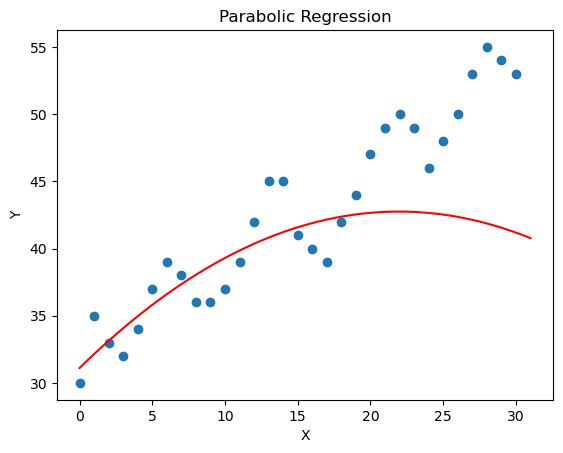

In [58]:
#Parabola

def parErr(c2, x, y):
    return np.sqrt(np.sum((c2[0]*x**2 + c2[1]*x + c2[2] -y)**2))
    
ic2 = [1,1,1] #initial parameters

parFit = opt.minimize(parErr, ic2, args=(train_X, train_Y))
fc2 = parFit.x

#Get and print error
tParErr = parErr(fc2, test_X, test_Y)
print('Error: ' + str(tParErr))

#Y regression
parReg = fc2[0]*xSmo**2 + fc2[1]*xSmo + fc2[2]

#Plot
plt.scatter(X, Y)
plt.plot(xSmo, parReg, 'r-')
plt.title('Parabolic Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Error: 144.69630854866918


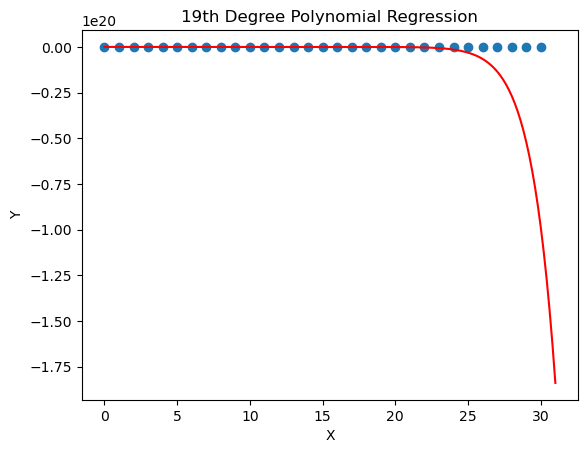

In [66]:
#19th deg Polynomial
def bigPoly(c3, x):
    return (c3[0]*x**19 + c3[1]*x**18 + c3[2]*x**17 + c3[3]*x**16 + c3[4]*x**15 + c3[5]*x**14
           + c3[6]*x**13 + c3[7]*x**12 + c3[8]*x**11 + c3[9]*x**10 + c3[10]*x**9  + c3[11]*x**8
            + c3[12]*x**7 + c3[13]*x**6 + c3[14]*x**5 + c3[15]*x**4 + c3[16]*x**3 + c3[17]*x**2
            + c3[18]*x + c3[19]*x)

def polyErr(c3, x, y):
    return np.sqrt(np.sum((bigPoly(c3, x) -y)**2))
    
ic3 = np.zeros(20) #initial parameters

polyFit = opt.minimize(polyErr, ic3, args=(train_X, train_Y))
fc3 = polyFit.x

#Get and print error
tPolyErr = polyErr(fc3, test_X, test_Y)
print('Error: ' + str(tPolyErr))

#Y regression
polyReg = bigPoly(fc3, xSmo)

#Plot
plt.scatter(X, Y)
plt.plot(xSmo, polyReg,'r-')
plt.title('19th Degree Polynomial Regression')
plt.xlabel('X')
plt.ylabel('Y')
#plt.ylim(np.min(Y), np.max(Y)) #Uncomment line to see points
plt.show()

# Part [iv]

Error: 78.57126858347505


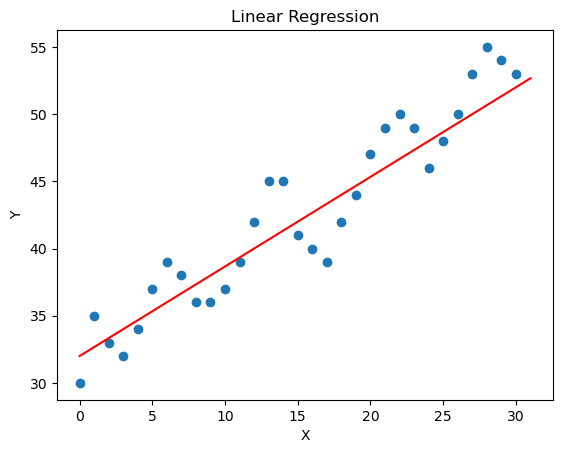

In [69]:
#Line fit 
ic1 = [1,1] #initial parameters

linFit = opt.minimize(linErr, ic1, args=(train2_X, train2_Y))
fc1 = linFit.x

#Get and print error
tLinErr = linErr(fc1, test_X, test_Y)
print('Error: ' + str(tLinErr))

#Y regression
linReg = fc1[0]*xSmo + fc1[1]

#Plot
plt.scatter(X, Y)
plt.plot(xSmo, linReg, 'r-')
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Error: 96.1338298642669


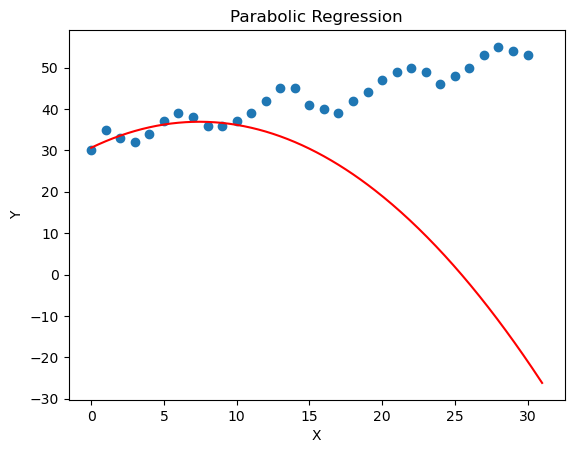

In [70]:
#Parabola

ic2 = [1,1,1] #initial parameters

parFit = opt.minimize(parErr, ic2, args=(train2_X, train2_Y))
fc2 = parFit.x

#Get and print error
tParErr = parErr(fc2, test_X, test_Y)
print('Error: ' + str(tParErr))

#Y regression
parReg = fc2[0]*xSmo**2 + fc2[1]*xSmo + fc2[2]

#Plot
plt.scatter(X, Y)
plt.plot(xSmo, parReg, 'r-')
plt.title('Parabolic Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Error: 144.69630854866918


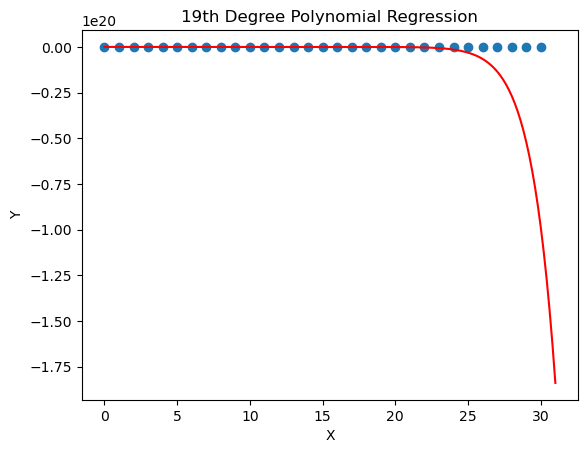

In [71]:
#19th deg Polynomial
    
ic3 = np.zeros(20) #initial parameters

polyFit = opt.minimize(polyErr, ic3, args=(train_X, train_Y))
fc3 = polyFit.x

#Get and print error
tPolyErr = polyErr(fc3, test_X, test_Y)
print('Error: ' + str(tPolyErr))

#Y regression
polyReg = bigPoly(fc3, xSmo)

#Plot
plt.scatter(X, Y)
plt.plot(xSmo, polyReg,'r-')
plt.title('19th Degree Polynomial Regression')
plt.xlabel('X')
plt.ylabel('Y')
#plt.ylim(np.min(Y), np.max(Y)) #Uncomment line to see points
plt.show()